# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 2 - Test Estadísticos
### Pilar García Murillo y Sonia Ruiz Pérez

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import seaborn as sns
import matplotlib as plt
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstest

In [2]:
df=pd.read_csv('files/taxis1.csv', index_col=0)
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.
1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?

- `Nuestra Hipótesis nula (H0) es que no existe relación entre la propina ('tips') y el precio total del viaje en taxi ('total').`
- `Nuestra Hipótesis alternativa (H1) es que las propinas se ven afectadas por el precio total del viaje en taxi.`

- `Error Tipo I: es si rechazamos la hipótesis nula cuando es verdadera. En nuestro caso, tendríamos un error tipo I si pensamos que existe relación entre la propina y el precio total del viaje en taxi, cuando en realidad no existe dicha relación.`
- `Error Tipo II: ocurre cuando la hipotesis nula es falsa y no la rechazamos. En nuestro caso, ocurre cuando pensamos que no existe relación entre las propinas y el precio total del viaje en taxi, sin embargo, la realidad es que sí existe una relación entre dichas variables.`

2. ¿Qué es la asimetría?

`La asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media. Su curva puede estar sesgada hacia un lado u otro ('skew').`

3. ¿Es vuestra variable respuesta asimétrica?

In [3]:
print('El valor de la "skewness" de la columna "tip", es decir, su asimetría es de', skew(df['tip']))

El valor de la "skewness" de la columna "tip", es decir, su asimetría es de 2.380535181416375


`Es decir, nuestra variable respuesta (dependiente) ('tip') presenta una distribución asimétrica positiva, ya que el valor de skew es mayor de 0. Por tanto, la mediana se encuentra hacia los valores más bajos de la variable, es decir, está sesgada a la derecha.`

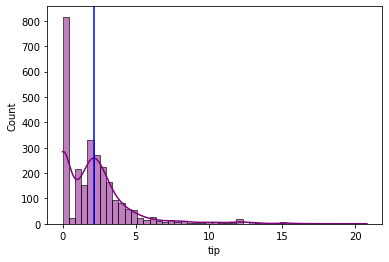

In [4]:
media=df['tip'].mean()
graf=sns.histplot(df['tip'],color='purple',kde=True)
graf.axvline(x=media,color='blue');

`Como podemos ver en la gráfica, la "cola" derecha de los datos es más larga, por tanto confirmamos el valor de "skew". La línea azul representa la media.`

4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [29]:
print('El resultado de la curtosis de la columna "tip"\n', kurtosistest(df['tip']))

El resultado de la curtosis de la columna "tip"
 KurtosistestResult(statistic=20.811709292864183, pvalue=3.390387904513919e-96)


`Dado que la curtosis determina el grado de concentración que presentan los valores alrededor de la zona central de la distribución de frecuencias, nuestra variable 'tip' tiene una curtosis de tipo Leptocurtosis.`

5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

/home/solkiria/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


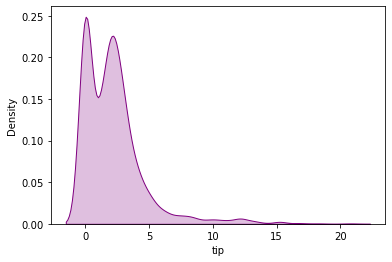

In [33]:
sns.distplot(
    df["tip"], 
    hist = False, 
    color = "purple", 
    kde_kws = {"shade": True, "linewidth": 1});

`Vemos que los datos representados no tienen forma de campana de Gauss.`

In [34]:
#Comprobamos que tenemos menos de 5000 filas en nuestro dataframe.
df.shape

(2696, 14)

In [37]:
print('El resultado del test de normalidad de la columna "tip" es:\n',stats.shapiro(df['tip']))

El resultado del test de normalidad de la columna "tip" es:
 ShapiroResult(statistic=0.7672148942947388, pvalue=0.0)


`Tras observar la gráfica que representa los datos de la columna 'tip' y obtener el p-value del test de Shapiro-Wilk, y tener un valor de 0, concluimos que los datos no tienen una distribución normal. Podemos rechazar la hipótesis nula (H0) de este estadístico, que decía que lo datos son normales.`

**Happy coding** 💪🏽